# load library

In [1]:
source("r/jupyter_common.R")

source("r/enrichment_analysis.R")
source("r/find_markers.R")
source("r/identify_cell_types.R")
source("r/plot_sc_clusters.R")


In [2]:
# data structure
suppressPackageStartupMessages(library(data.table))

# scRNA-seq
suppressPackageStartupMessages(library(Seurat))


# parameters

In [3]:
col_cluster_types <- "cluster.type.harmony"
str_column_of_meta_data_cluster <- "RNA_harmony_th.0"
str_umap_reduction <- "umapharmony"

figure_format <- "pdf"


# read scRNA-seq

In [4]:
cancer_type <- "male-bc"

dir_rna <- "/home/hkim77/francolab.w/sc-rna-seq/male-bc/run-20220725"
fname_rna <- sprintf("%s/output_male-bc/rds_%s/male-bc_sc-rna-seq_merged_seurat_obj.rds",
                     dir_rna, cancer_type)

rna <- readRDS(fname_rna)



https://mojaveazure.github.io/seurat-object/reference/Seurat-methods.html

dim: The number of features (nrow) and cells (ncol) for the default assay; note: while the number of features changes depending on the active assay, the number of cells remains the same across all assays


## list_sort_atac

In [5]:

list_sort_atac <- sort_cluster_members(rna, args,
                    col_cluster_types = col_cluster_types,
                    str_umap_reduction = str_umap_reduction,
                    f_merge_immune_cell = FALSE)


Sample,NA,Adipocytes,CD4+ T-cells,CD8+ T-cells,Chondrocytes,DCs,Endothelial cells,Epi. Non-tumor,Epi. Tumor,Epi. Unassigned,Fibroblasts,HSC,Macrophages,Mast cells,Mesangial cells,Monocytes,Myocytes,Pericytes,Smooth muscle
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
446B7L,7,30,NA,1,1,4,1306,164,1647,1865,502,NA,41,NA,2,4,9,1,NA
4CC61L,13,2,1,4,22,26,2,NA,2648,31,503,1,95,2,1,5,NA,NA,1


Sample,NA,Chondrocytes,HSC,Mesangial cells,Myocytes,Pericytes,Smooth muscle
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
446B7L,7,1,NA,2,9,1,NA
4CC61L,13,22,1,1,NA,NA,1


Sample,Adipocytes,CD4+ T-cells,CD8+ T-cells,DCs,Endothelial cells,Epi. Non-tumor,Epi. Tumor,Epi. Unassigned,Fibroblasts,Macrophages,Mast cells,Monocytes,Others
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
446B7L,30,NA,1,4,1306,164,1647,1865,502,41,NA,4,20
4CC61L,2,1,4,26,2,NA,2648,31,503,95,2,5,38


## nv_colors

In [6]:
nv_colors <- list_sort_atac$nv_color_cluster_type_ordered
nv_colors


1-Epi. Unassigned   8-Epi. Unassigned        0-Epi. Tumor        2-Epi. Tumor 
          "#A0E989"           "#87CB72"           "#6EAE5C"           "#559145" 
       5-Epi. Tumor        6-Epi. Tumor       4-Fibroblasts 3-Endothelial cells 
          "#3C742F"           "#245719"           "#FABFD2"           "#93CEFF" 
      7-Macrophages 
          "#EEC900"

# multiple genes

## pattern_cluster.type_removal

In [7]:
pattern_cluster.type_removal <- "1-|6-|8-"


## genes_of_interest

In [8]:
genes_of_interest <- c("ANXA2", "LAMB3", "PRDX4")


## order_x

In [9]:
order_x <- c("0-Epi. Tumor", "2-Epi. Tumor", 
            "4-Fibroblasts", "5-Fibroblasts", "3-Endothelial cells",
            "7-Macrophages")


## boxplot

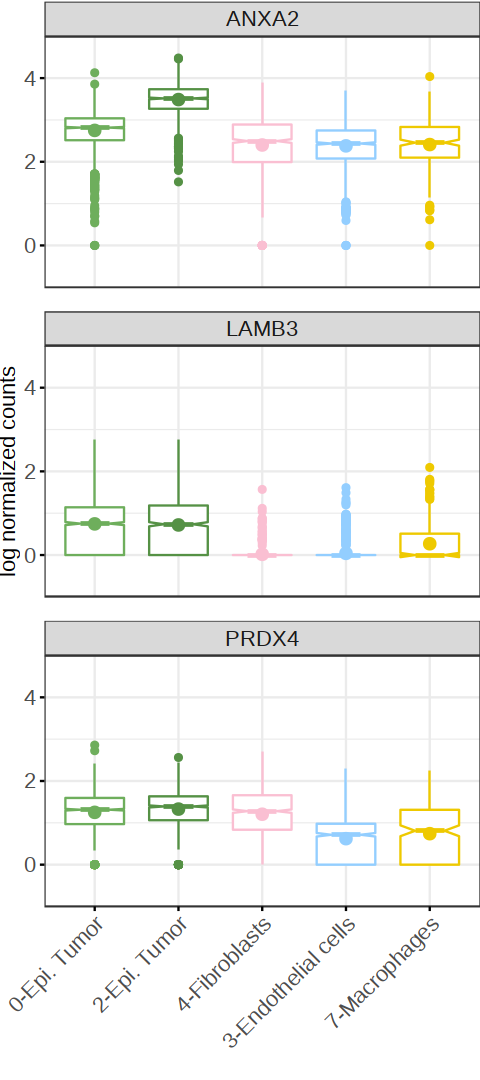

In [10]:
facet.by <- genes_of_interest
str_title <- "genes_selected"

gg <- print_ggpubr(rna,
            x = col_cluster_types, y = NULL, color = col_cluster_types, 
            order_x = order_x,   
            facet.by = facet.by, facet.ncol = 1,
            plot_type = "boxplot",
            color_manual = nv_colors, fill_manual = nv_colors,
            ylimits = c(-1, 5),
            ybreaks = pretty(c(0, 4), n = 2),
            yexpand = c(0, 0),
            yintercept = NULL,
            xlim = NULL, ylim = NULL,
            xlab = "", ylab = "log normalized counts",
            angle = 45, font_size = 13,
            width = 4, height = 9,
            str_condition_plot = sprintf("cluster_type_%s", str_title),
            n_log = 0)


# session info

In [11]:
writeLines(capture.output(sessionInfo()), "txt/sessionInfo.txt")


# reference

https://satijalab.org/seurat/

